# Human Resources Diversity Analysis

This is my debut project, so I'd really appreciate your feedback :)
I select some of the questions provided by Dr. Rich Huebner, so we can analyse the organization's workforce regarding diversity.

Here they are:

1. What are our best recruiting sources if we want to ensure a diverse organization?
2. Are there areas of the company where pay is not equitable?
3. What is the overall diversity profile of the organization?

We will be analyzing each matter with regards to race, gender and age.

## Importing what's important
These are standard libraries for EDA. Here we go:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

## Exploring the data
### First Look
Let's load the dataset and take a peek

In [2]:
hr_data = pd.read_csv('../input/human-resources-data-set/HRDataset_v13.csv')
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               310 non-null    object 
 1   EmpID                       310 non-null    float64
 2   MarriedID                   310 non-null    float64
 3   MaritalStatusID             310 non-null    float64
 4   GenderID                    310 non-null    float64
 5   EmpStatusID                 310 non-null    float64
 6   DeptID                      310 non-null    float64
 7   PerfScoreID                 310 non-null    float64
 8   FromDiversityJobFairID      310 non-null    float64
 9   PayRate                     310 non-null    float64
 10  Termd                       310 non-null    float64
 11  PositionID                  310 non-null    float64
 12  Position                    310 non-null    object 
 13  State                       310 non

In [3]:
# Lots of empty rows. Some cleaning now:
hr_data.dropna(how='all', inplace=True)

### Racial Diversity

In [4]:
# A first look at the racial diversity situation - both in absolute and percentual figures:
hr_data.RaceDesc.name = 'Racial group'
display(hr_data.RaceDesc.value_counts(),
        hr_data.RaceDesc.value_counts(normalize=True) * 100)

White                               193
Black or African American            57
Asian                                34
Two or more races                    18
Hispanic                              4
American Indian or Alaska Native      4
Name: Racial group, dtype: int64

White                               62.258065
Black or African American           18.387097
Asian                               10.967742
Two or more races                    5.806452
Hispanic                             1.290323
American Indian or Alaska Native     1.290323
Name: Racial group, dtype: float64

According to 2018 data by the U.S Bureau of Labor Statistics, the country's labor force is made of 78% Whites, 13% Blacks and 6% Asians (https://www.bls.gov/opub/reports/race-and-ethnicity/2018/home.htm). Taking that as a baseline, we can say that the company is diverse from a racial standpoint.

**Let's see which recruitment sources hire the most non-white employees:**

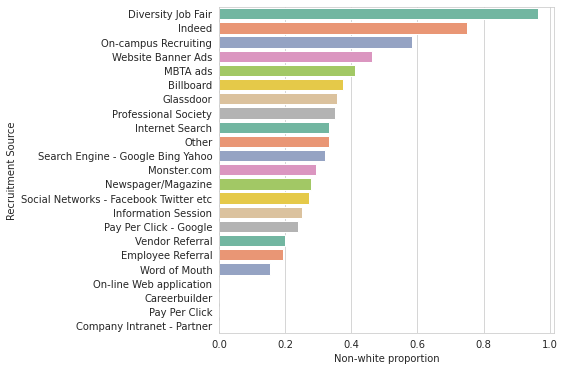

In [5]:
hr_data['Non-white'] = (hr_data['RaceDesc'] != 'White')
fig = plt.figure(figsize=(6, 6)), sns.set_style('whitegrid')
# Ordering for better visualization
ordered_nw = hr_data.groupby('RecruitmentSource')['Non-white'].mean().reset_index().sort_values('Non-white', ascending=False)
ax = sns.barplot(data=ordered_nw, y='RecruitmentSource', x='Non-white', palette='Set2')
ax.set_xlabel('Non-white proportion'), ax.set_ylabel('Recruitment Source');

Unsurprisingly, **Diversity Job Fair** plays a crucial role in promoting racial diversity. **Indeed and On-campus Recruiting** can also be lauded for bringing non-white employees more often than not. 

On the other hand, **Pay Per Click, On-line Web application, Careerbuilder and Company Intranet** have no contribution to racial diversity at all.


Of course, **respect to diversity includes egalitarian compensation, regardless of skin color.** Let's take a look at that now.

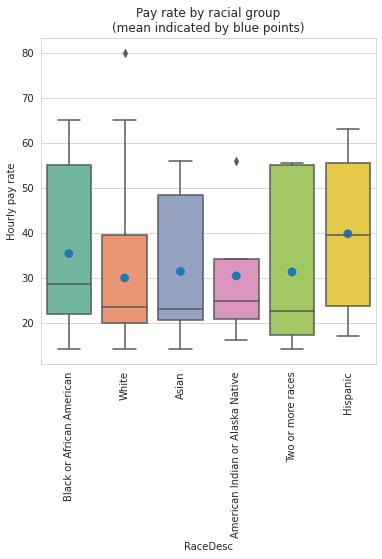

In [6]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=hr_data, x='RaceDesc', y='PayRate', palette='Set2')
ax.set_xticklabels(hr_data.RaceDesc.unique(), rotation=90)
sns.pointplot(data=hr_data, x='RaceDesc', y='PayRate', join=False, ci=None, ax=ax);
ax.set_ylabel('Hourly pay rate'); ax.set_title('Pay rate by racial group\n(mean indicated by blue points)');

There are a few differences in median and mean payment across races. For instance, Hispanics are placed a bit higher. This does _not_, however, seem particularly problematic. Let's look at each department.

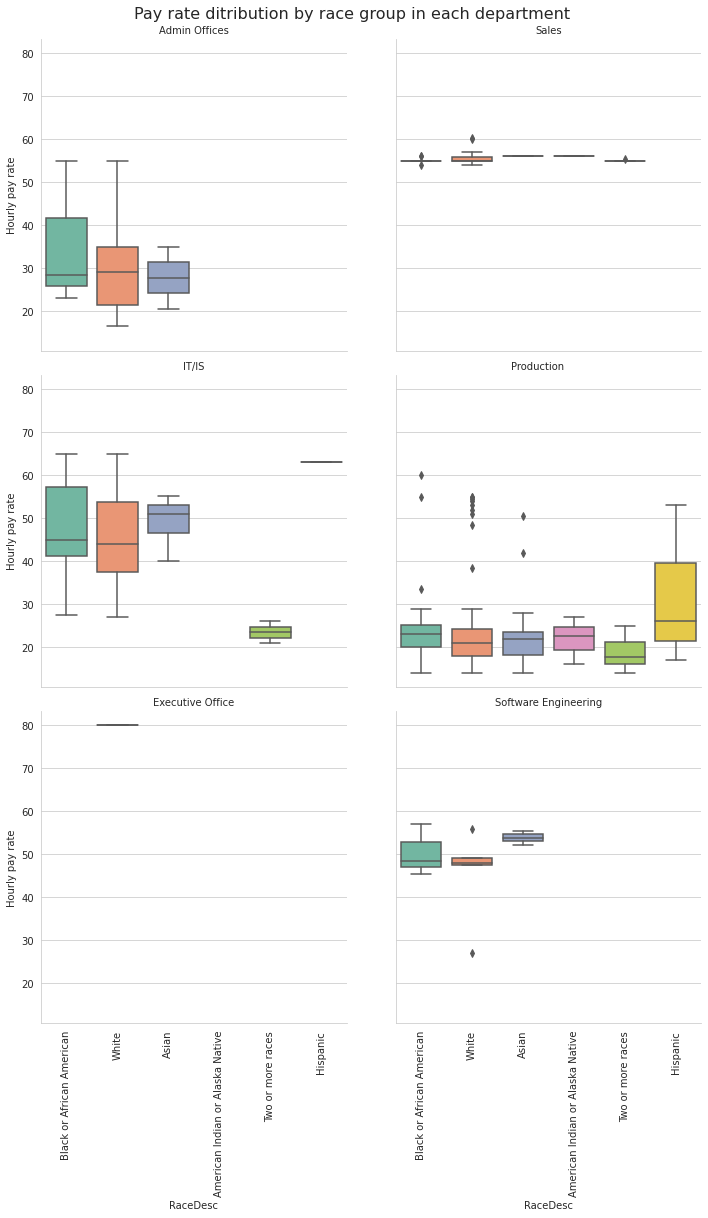

In [7]:
g = sns.catplot(data=hr_data, x='RaceDesc', col_wrap=2,
                y='PayRate', col='Department', kind='box', palette='Set2')
g.set_xticklabels(hr_data.RaceDesc.unique(), rotation=90)
g.set_ylabels('Hourly pay rate')
g.fig.suptitle(
    'Pay rate ditribution by race group in each department', fontsize=16)
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.95)

An in-depth look at each department shows that payment is generally egalitarian. **The exception is *IT/IS*, wherein those of *two or more races* have a diminished pay rate.** Why is that? Are these workers in low-paid positions?

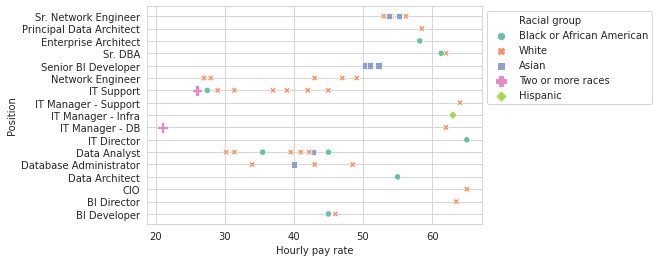

In [8]:
# Removing whitespace in "Data Analyst " (Thanks for noticing, Jordan!)
hr_data['Position'] = hr_data['Position'].str.strip()

ax = sns.scatterplot('PayRate', 'Position', 'RaceDesc', data=hr_data.loc[hr_data.Department=='IT/IS'],
                     palette='Set2', style='RaceDesc',size='RaceDesc', sizes=[40, 40, 40, 120, 40]);
ax.legend(bbox_to_anchor=(1, 1)).texts[0].set_text('Racial group'); ax.set_xlabel('Hourly pay rate'); 

The plot reveals that employees of this racial group are actually being paid lower than colleagues in the same position. This could be the result of discriminatory practices. Let's investigate further to see if there are any reasonable causes for the wage gap:

In [9]:
# Filtering only rows that contain "two or more races" workers
position_rows = hr_data.Position.isin(['IT Support', 'IT Manager - DB'])
perf_indicators = ['RaceDesc','Position', 'PerformanceScore', 'SpecialProjectsCount', 'DaysLateLast30','EngagementSurvey']
it_is_lookup = hr_data.loc[position_rows, perf_indicators].sort_values(['Position','RaceDesc']).set_index('RaceDesc')
it_is_lookup

,Position,PerformanceScore,SpecialProjectsCount,DaysLateLast30,EngagementSurvey
RaceDesc,,,,,
Two or more races,IT Manager - DB,Fully Meets,6.0,NaN,2.51
White,IT Manager - DB,Fully Meets,7.0,0.0,2.96
Black or African American,IT Support,Fully Meets,5.0,0.0,4.30
Two or more races,IT Support,Exceeds,5.0,0.0,4.64
White,IT Support,Fully Meets,6.0,0.0,2.55
White,IT Support,Fully Meets,5.0,0.0,1.21
White,IT Support,Fully Meets,6.0,0.0,1.84
White,IT Support,Fully Meets,7.0,0.0,2.21
White,IT Support,Fully Meets,6.0,0.0,4.11


The perfomance of *two or more races* employees is rather levelled with that of colleagues in the same position, yet their pay rates are the lower than any other. **As far as the dataset goes, this points to the existence of discrimination.**

---
**DISCLAIMER: here and throughout the end of this analysis, there is an observation that distinguishes itself from the others: at Executive Office, we find the President & CEO of the company, who is naturally the most well-paid. Take a look at her:**

In [10]:
hr_data.loc[hr_data['Department'] == 'Executive Office'] 

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Non-white
73,"King, Janet",1.001495e+09,1.0,1.0,0.0,1.0,2.0,3.0,0.0,80.0,...,Board of Directors,9.0,Pay Per Click - Google,Fully Meets,4.83,3.0,0.0,1/17/2019,0.0,False


### Gender Equality

In [11]:
# For clarity:
hr_data.replace({'Sex': {'F': 'Female', 'M ': 'Male'}}, inplace=True)
hr_data.Sex.name = 'Gender'
# Now, to an overview in gender distribution:
print(hr_data.Sex.value_counts(),'\n\n', (hr_data.Sex.value_counts(normalize=True) * 100), sep='')

Female    177
Male      133
Name: Gender, dtype: int64

Female    57.096774
Male      42.903226
Name: Gender, dtype: float64


The numbers are balanced, and **most employees are female.** 

Taking a look at each department now:

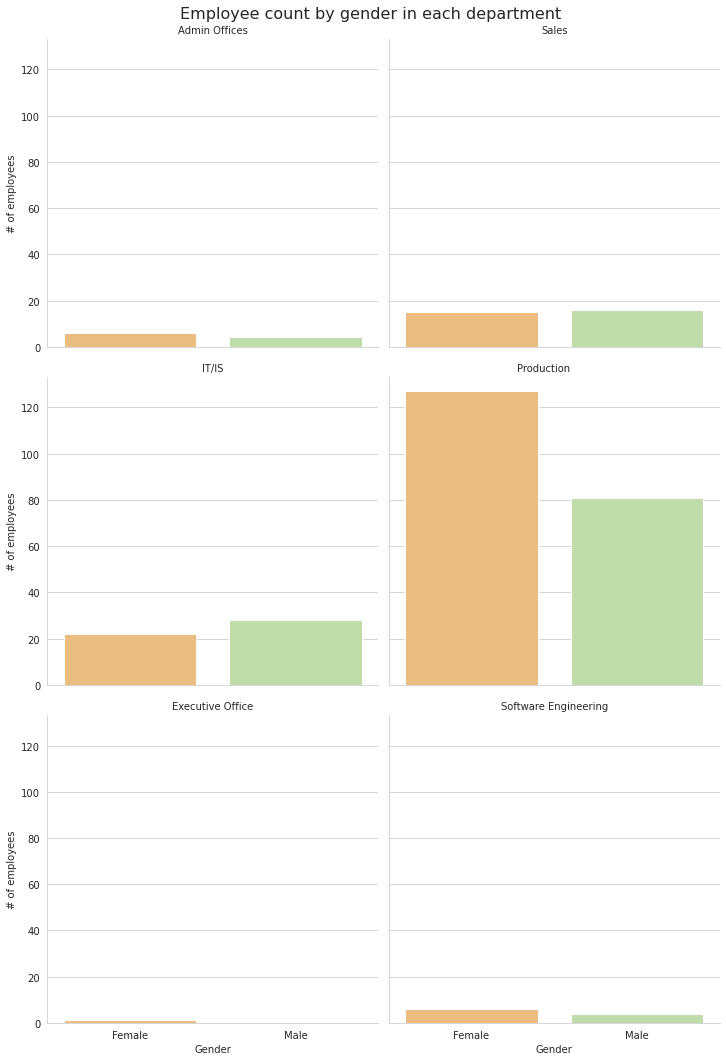

In [12]:
# By department
g = sns.catplot(data=hr_data, x='Sex', col='Department',
                col_wrap=2, palette='Spectral', kind='count')
g.set_xlabels('Gender'), g.set_ylabels('# of employees')
g.fig.suptitle(
    'Employee count by gender in each department', fontsize=16)
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.95)

We can see that the numeric difference stems from the *Production department*, where women outnumber men by 50%.

**But are female employees getting equal pay?**

In [13]:
GenderPay = hr_data.groupby('Sex')[['PayRate']]
display(GenderPay.agg(['mean', 'median']))

PayRate       
             mean median
Sex                     
Female  29.472147   24.0
Male    33.697143   26.0

**That's a *no*.** Women's income is lower in general.

How does that distribute across departments?

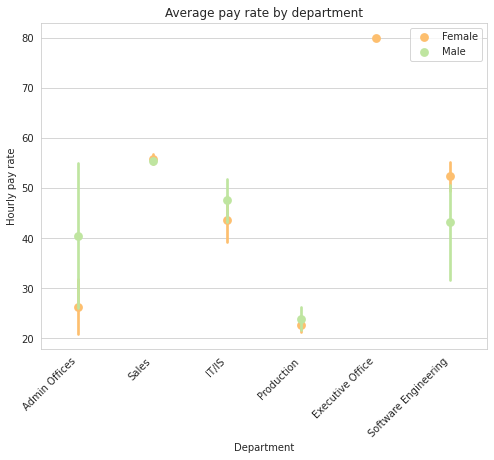

In [14]:
# Removing whitespace in 'Production':
hr_data['Department'] = hr_data['Department'].str.strip()
plt.figure(figsize=(8, 6))
ax = sns.pointplot(data=hr_data, x='Department', y='PayRate',
                   hue='Sex', palette='Spectral' , join=False)
ax.set_xticklabels(hr_data.Department.unique(), rotation=45,
                   horizontalalignment='right');
ax.legend()
ax.set_title("Average pay rate by department"), ax.set_ylabel(
    'Hourly pay rate');

At the plot, we identify some divergences in average pay by gender. Women's average pay is quite higher at Software Engineering department. However, it is important to note that only a handful of employees work there, in such a way that it doesn't affect the overall statistics so much.

On the other hand, *Production* plays a big part in broadening the wage gap because:
1. the department has the lowest pay rate; 
2. this decreases female mean compensation by a lot, **since it contains the largest number of workers, most of them being women**;
3. considering the employee amount, even though the inequality within Production itself isn't great, it ends up making a significant impact.

**We can see a substantial wage gap at Admin Offices**; there, women's average income is much lower than men's.

It demands some examining:

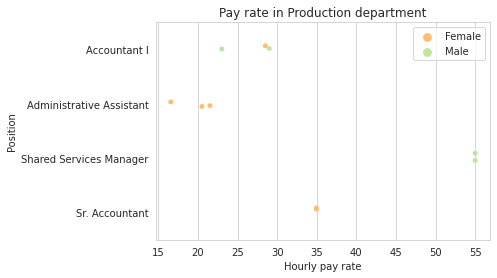

In [15]:
ax = sns.stripplot('PayRate', 'Position', hue='Sex',
                   data=hr_data[hr_data.Department == 'Admin Offices'],
                  palette='Spectral')
ax.set_xlabel('Hourly pay rate'), ax.set_title('Pay rate in Production department')
ax.legend();

An in-depth analysis reveals that the wage disparity at Admin Offices, the largest throughout departments, **comes from the presence of two men working in a high-paid position (*shared services manager*), contrasted with three women employed as *administrative assistant*.**

Among those whose title is Accountant I, the female employee's pay rate is only marginally lower than that of a male colleague. We can also see that only women work as Sr. Accountants, **which shows that females aren't necessarily kept away from higher positions in this department**.

### Age Diversity
Now, you might have noted that there's no age info in the dataset. Well, at least *not yet*.

We can obtain it through the date of birth (DOB) column

In [16]:
# We can make our own age column.
# But first, let's convert 'DOB' to datetime format, with a bit of chaining to keep just the date
from dateutil.relativedelta import relativedelta
hr_data['DOB'] = pd.to_datetime(hr_data['DOB']).dt.date.astype('datetime64')
# No employees were born after year 2000, so DOBs like 2068 should have 100 years removed:
hr_data.loc[hr_data.DOB.dt.year > 2000, 'DOB'] -= pd.DateOffset(years=100)
# Now, to getting the age:
hr_data['Age'] = pd.Series(dtype='int')
for ind, date in hr_data.DOB.iteritems():
    hr_data.loc[ind, 'Age'] = relativedelta(
        pd.to_datetime('today'), date).years
hr_data.Age = hr_data.Age.astype('int64')
#Some summary statistics
hr_data['Age'].apply(['min', 'median', 'max'])

min       27.0
median    39.0
max       69.0
Name: Age, dtype: float64

Now we have the employees' ages stored in a column. They range from 27 to 69; the median is 39.
Let's visualize how the number of workers is distributed by age, and also take a look at percentages by age group:

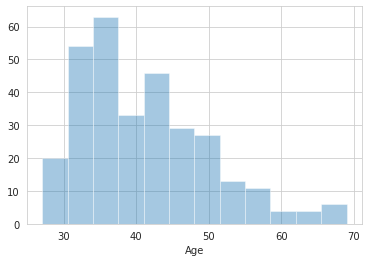

In [17]:
ax = sns.distplot(hr_data['Age'], kde=False)

In [18]:
agegroups= pd.cut(hr_data.Age, [25,40,55,70])
agegroups.name = 'Age group'
agegroups.value_counts(normalize=True) *100

(25, 40]    54.838710
(40, 55]    38.709677
(55, 70]     6.451613
Name: Age group, dtype: float64

The staff's ages are mainly at early to mid-30s, also counting high at early 40s.
**The number of employees is substantially lower for ages 55 and over, amounting only to no more than a few dozens, or 6.4%.**

Considering how low the numbers go when it comes to older workers, it's important that we inquire how age diversity is promoted through recruiting.

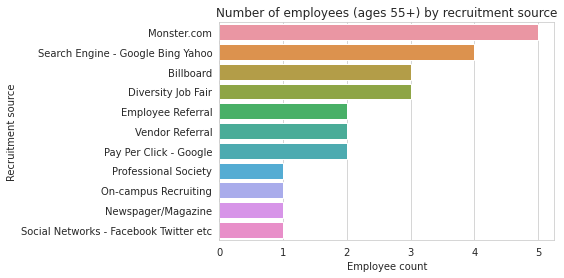

In [19]:
ordered_55 = hr_data.loc[hr_data.Age >= 55, 'RecruitmentSource'].value_counts()
ax = sns.barplot(x=ordered_55.values,y=ordered_55.index)
ax.set_ylabel('Recruitment source'), ax.set_xlabel('Employee count'), ax.set_xticks(range(6))
ax.set_title('Number of employees (ages 55+) by recruitment source');

**Monster.com** scores the highest,hiring five mature employees, followed by **search engines**, with four. The numbers are really low, in such a way that no source is currently bringing a reasonable amount of older people to the company.

**Are salaries subject to *ageism* at Dental Magic?** It is necessary to take a look at how mature workers are being payed.

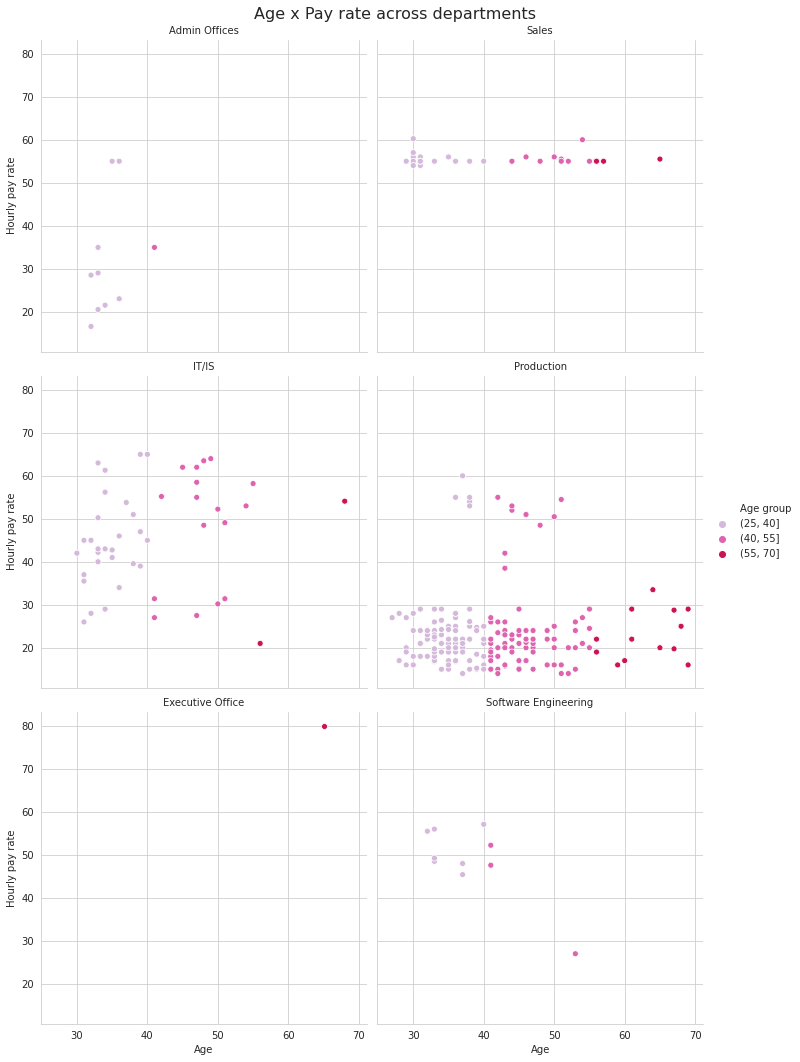

In [20]:
g = sns.relplot('Age', 'PayRate', agegroups, hue_order=agegroups.cat.categories, col='Department',
 col_wrap=2, data=hr_data, palette='PuRd')
g.set_xlabels('Age'), g.set_ylabels('Hourly pay rate')
g.fig.suptitle('Age x Pay rate across departments', fontsize=16)
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.95)

We saw before that the employee count goes down for ages 50 and over. In the *Production* department, we can see that **salaries are also diminished**: these workers have a pay rate below 35, whereas some younger ones get as high as $60/hour. This calls for a more detailed analysis of this specific division.

Although the plot is focused on salary, it also reveals that both *Admin Offices* and *Software Engineering* barely have any workers over 40.

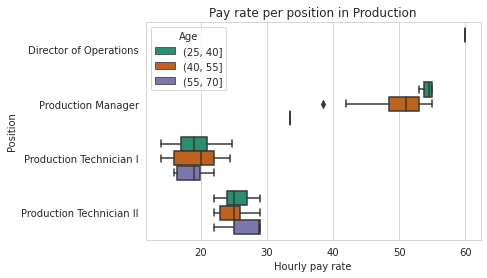

In [21]:
agegroups= pd.cut(hr_data.Age, [25,40,55,70])
ax = sns.boxplot('PayRate', 'Position', agegroups,
                   data=hr_data.loc[hr_data.Department=='Production'], palette='Dark2') ;
ax.set_xlabel('Hourly pay rate'); ax.set_title('Pay rate per position in Production');

The graph clarifies that it is generally not the case that older workers are getting a lower salary than their position's average. **Matures' pay rates are limited because almost all of them work in lesser functions (Production Technician I and II).**

**In *Software Engineering*, there is an outlier: a worker just over 50 years old, whose pay rate is much lower than that of younger colleagues**. We will now take a closer look at the department to shed light on the matter.

In [22]:
# The department:
soft_engs = hr_data.Department == 'Software Engineering'
# Columns for analysis:
relevant_info = ['Employee_Name', 'Age', 'Position', 'PayRate',
                 'PerformanceScore', 'EmploymentStatus', 'EngagementSurvey']
# Now, we select them and look at some relevant columns:
hr_data.loc[soft_engs, relevant_info].sort_values('Age', ascending=False).set_index('Age')

,Employee_Name,Position,PayRate,PerformanceScore,EmploymentStatus,EngagementSurvey
Age,,,,,,
53,"Sweetwater, Alex",Software Engineering Manager,27.00,Fully Meets,Active,3.84
41,"Andreola, Colby",Software Engineer,47.60,Fully Meets,Active,3.04
41,"Patronick, Luke",Software Engineer,52.25,Exceeds,Voluntarily Terminated,1.10
40,"Del Bosque, Keyla",Software Engineer,57.12,Fully Meets,Active,3.79
37,"Szabo, Andrew",Software Engineer,48.00,Exceeds,Active,2.61
37,"True, Edward",Software Engineer,45.42,Fully Meets,Voluntarily Terminated,1.11
33,"Carabbio, Judith",Software Engineer,56.00,Fully Meets,Active,4.96
33,"Exantus, Susan",Software Engineer,48.50,Needs Improvement,Terminated for Cause,2.55
33,"Saada, Adell",Software Engineer,49.25,Fully Meets,Active,1.74


We now see that the outlier is Alex Sweetwater. 

He is the manager of the department, but his pay is registered as the lowest one. It is highly unlinkely that his pay rate is lower than his subordinates'. Also, the data doesn't point to bad performance. **It might be sensible to assume that this piece of information is actually *incorrect*, possibly due to input error.**

## Sharing findings and insights
 

### 1. What are our best recruiting sources if we want to ensure a diverse organization?

It's important that every organization strives to make sure their recruitment practices aren't affected by prejudices or biases.
This matter should be addressed with regards to which groups are rejected the most when searching for jobs. 
**Discrimination is an issue that constantly hits non-white people, women and elders.**

Throughout the analysis of all features, *Diversity Job Fair* proved to be vital in making Dental Magic more plural. It should only be encouraged and expanded.

Regarding race, more than half of the people hired via *Indeed* and *on-campus recruiting* are from underrepresented groups. Contrastingly, some sources need to undergo further scrutiny as to *why they only bring white employees*.

When it comes to age diversity, the organization is far behind, and no recruitment source is distinctly efficient.

### 2. Are there areas of the company where pay is not equitable?

A deep analysis has showed some wage gaps inside departments:

1. **At *IT/IS*, people of *two or more races* are paid significantly less than other workers in the same job position**. None of the data show a cause for that.

2. **Women's income is lower overall.** The gap stems mainly from two sources:
  - in *Production*, the least well-paid department, females outnumber males by some extent, which results in a greater impact in women's overall salary. Their average income is also slightly inferior in the department;
  - in *Admin Offices*, the wage gap between genders is substantial, though it is hard to tell if the distribution of functions is discriminatory.

3. **Most workers aged 50+ in *Production* work at lower-paid positions.**






### 3. What is the overall diversity profile of the organization?

**Race**

While more than half of the workforce is made of white people, we've seen before that the jobs are more well distributed along underrepresented groups comparatively to official statistics in a national level. 

*Hispanics* get a slightly higher pay rate in average, whereas *American Indian or Alaska Natives* perform lower on that variable. Considering that these groups have only four members each, it is premature to conclude the divergence is caused by any discriminatory treatment.

**Gender**

The workforce is predominantly female. Additionally, Dental Magic's CEO is a woman, and some more can be found in other high positions. These are positive, distinctive traits in a world that favors hiring male workers for most roles, especially leading ones.

A potential highlight is how the company hires many women to work in *Production*, a department where labor is often manual.

However, the company still faces some income inequality related to gender. The issue should be further investigated and dealt with.

**Age**

Only 6.4% of the workers are 55 or older. This is certainly a diversity issue, specially looking at how 2018 data from the US BLS shows that 23.1% of the workforce in the country is in that age group (https://www.bls.gov/emp/graphics/2019/labor-force-share-by-age-group.htm).

**The matter is specially precarious in the Software Engineering department and Admin Offices, that together count no more than a handful employees over *40*.**


*Sales*, on the other hand, performs really well, having a good amount of well-paid elderly workers.

### Final thoughts 

Dental Magic is a generally diverse company, though it still has some faults.

The biggest issue is the lack of age diversity, which is not truly promoted by any recruitment source. The organization should review its hiring practices to remove any potential bias.

What other aspects deserve some attention?